<a href="https://colab.research.google.com/github/amanparihar27/PCA-visulization/blob/main/Copy_of_PCA_mine_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/train.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.isnull().mean()*100

,0
label,0.000000
pixel0,0.000000
pixel1,0.000000
pixel2,0.000000
pixel3,0.000000
...,...
pixel779,0.019391
pixel780,0.019391
pixel781,0.019391
pixel782,0.019391


In [6]:
df.dropna(inplace=True)

In [7]:
df.shape
# Here 784 cols are for pixels and one shows label or the image they contain

(5156, 785)

In [8]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
2087,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
import matplotlib.pyplot as plt

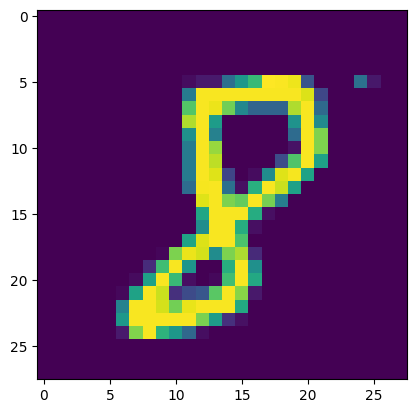

In [10]:
plt.imshow(df.iloc[395, 1:].values.reshape(28,28))

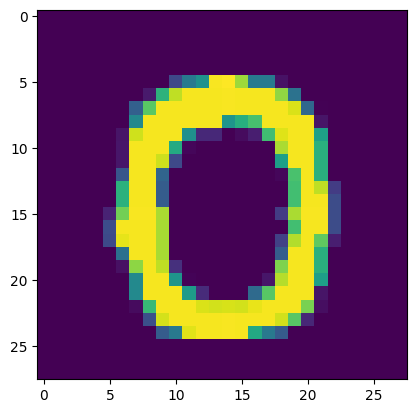

In [11]:
plt.imshow(df.iloc[2409, 1:].values.reshape(28,28))

In [12]:
# Separate dependent and ind cols
X=df.iloc[:, 1:]
y=df['label']

In [13]:
# Train test split
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
X_train.shape

(4124, 784)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier()

In [18]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
import time
start= time.time()
y_pred=knn.predict(X_test) # I just tried to find out the time take to predict the
print(time.time()-start)

0.3595387935638428


In [20]:
# In the abobe code we found y_pred and we used KNN classifier, here each row is compare with all 33000 rows and chose the nearest.

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9176356589147286

In [22]:
# We get an accuracy of 96.4% using this method

### PCA

In [23]:
# Now we'll try to achieve same or more accuracy using far less no. of columns through PCA

In [24]:
# First step is standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [26]:
from sklearn.decomposition import PCA

pca=PCA(n_components=None)  # Default value is none which means there will be same no. of PC as initials rows

In [27]:
X_train_trf1 = pca.fit_transform(X_train_sc)
X_test_trf1 = pca.transform(X_test_sc)

In [28]:
X_train_trf1.shape

(4124, 784)

In [29]:
# We still have 784 cols

In [30]:
knn=KNeighborsClassifier()

In [31]:
knn.fit(X_train_trf1, y_train)

y_pred2=knn.predict(X_test_trf1)

In [32]:
accuracy_score(y_test, y_pred2)

0.8905038759689923

In [33]:
# Since we did not reduce dim our accuracy reduced
# Lets reduce the Dimension to 100

In [34]:
from sklearn.decomposition import PCA

pca2=PCA(n_components=100)

In [35]:
X_train_trf2 = pca2.fit_transform(X_train_sc)
X_test_trf2 = pca2.transform(X_test_sc)

In [36]:
X_train_trf2.shape

(4124, 100)

In [37]:
knn.fit(X_train_trf2, y_train)

y_pred3 = knn.predict(X_test_trf2)

accuracy_score(y_test, y_pred3)

0.9060077519379846

In [38]:
# We used the same KNN Classiefier after appling PCA and got 90.6% accuracy with only 100 col

In [70]:
for i in range(1,785):
    pca3=PCA(n_components=i)

    X_train_trf3=pca3.fit_transform(X_train_sc)
    X_test_trf3 = pca3.transform(X_test_sc)

    knn=KNeighborsClassifier()
    knn.fit(X_train_trf3, y_train)
    y_pred4 = knn.predict(X_test_trf3)

    print(accuracy_score(y_test, y_pred4))

0.2616279069767442
0.40261627906976744
0.5072674418604651
0.6729651162790697
0.7398255813953488
0.8081395348837209
0.8270348837209303
0.8328488372093024
0.8444767441860465
0.8604651162790697
0.8575581395348837
0.8561046511627907
0.8590116279069767
0.8619186046511628
0.8924418604651163
0.8909883720930233
0.8968023255813954
0.8953488372093024
0.8953488372093024
0.8997093023255814
0.8997093023255814
0.9040697674418605
0.9040697674418605
0.9098837209302325
0.9156976744186046
0.9142441860465116
0.9156976744186046
0.9142441860465116
0.9098837209302325
0.9127906976744186
0.9156976744186046
0.9098837209302325
0.9098837209302325
0.9142441860465116
0.9156976744186046
0.9098837209302325
0.9098837209302325
0.9069767441860465
0.9084302325581395
0.9055232558139535
0.9069767441860465
0.9098837209302325
0.9055232558139535
0.9084302325581395
0.9142441860465116
0.9127906976744186
0.9142441860465116
0.9098837209302325
0.9084302325581395
0.9113372093023255
0.9098837209302325
0.9098837209302325
0.914244186

In [39]:
# Transforming to a 2D data
import plotly.express as px

In [40]:
pca4=PCA(n_components=2)

X_train_trf4=pca4.fit_transform(X_train_sc)
X_test_trf4 = pca4.transform(X_test_sc)

In [41]:
X_train_trf4.shape

(4124, 2)

In [42]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf4[:,0], y=X_train_trf4[:,1], color=y_train_trf)
fig.show()

In [43]:
# Converting into 3D

In [44]:
pca5=PCA(n_components=3)

X_train_trf5=pca5.fit_transform(X_train_sc)
X_test_trf5 = pca5.transform(X_test_sc)

In [45]:
y_train_trf=y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf5[:,0], y=X_train_trf5[:,1], z=X_train_trf5[:,2], color=y_train_trf)
fig

In [46]:
# As we can see in the above fig there are few color dots which do not overlap at all, which indicates that they must be looking very different like say 0 and 7
# If we see 4 and 9 are quite close, 3 and 8 are close too

In [47]:
pca5.explained_variance_
# Eigen values


array([39.92755421, 28.84365566, 27.31178435])

In [48]:
pca5.explained_variance_.shape


(3,)

In [49]:
pca5.components_
# Eigen vectors


array([[-4.98971142e-18,  6.08185679e-20,  1.53852382e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-7.29328782e-18, -6.02868544e-18,  9.70915239e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.20173501e-16, -2.17871360e-18, -1.12261988e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [50]:
pca5.components_.shape


(3, 784)

In [51]:
pca5.explained_variance_ratio_*100


array([6.07577967, 4.38914179, 4.15603679])

In [52]:
pca6 = PCA(n_components=None)
X_train_trf6 = pca6.fit_transform(X_train_sc)
X_test_trf6 = pca6.transform(X_test_sc)

In [53]:
pca6.explained_variance_

array([3.99275542e+01, 2.88436557e+01, 2.73117844e+01, 2.15951295e+01,
       1.80667020e+01, 1.60714977e+01, 1.34829931e+01, 1.26944563e+01,
       1.13958816e+01, 1.01639543e+01, 9.68360779e+00, 8.54204273e+00,
       8.28592108e+00, 7.94626913e+00, 7.66198219e+00, 7.48249789e+00,
       6.97326454e+00, 6.81318227e+00, 6.75786674e+00, 6.39718360e+00,
       6.23850826e+00, 5.87453210e+00, 5.77718819e+00, 5.62310337e+00,
       5.49282592e+00, 5.16703177e+00, 4.95710483e+00, 4.86989921e+00,
       4.81049470e+00, 4.66217210e+00, 4.55113270e+00, 4.41779172e+00,
       4.38162856e+00, 4.25818829e+00, 4.21097734e+00, 4.08611206e+00,
       3.99866978e+00, 3.96715505e+00, 3.83801589e+00, 3.82841410e+00,
       3.72510584e+00, 3.64113455e+00, 3.59940215e+00, 3.49943933e+00,
       3.41388824e+00, 3.36154335e+00, 3.30515690e+00, 3.20556676e+00,
       3.15173821e+00, 3.10600035e+00, 3.04801566e+00, 3.01839672e+00,
       2.90563182e+00, 2.88268467e+00, 2.86214284e+00, 2.85160820e+00,
      

In [54]:
pca6.explained_variance_.shape

(784,)

In [55]:
pca6.components_

array([[-5.52841595e-19, -2.77555756e-17, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.31010166e-18,  1.11022302e-16,  1.11022302e-16, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.30682740e-19, -8.32667268e-17,  5.55111512e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 0.00000000e+00,  2.87300479e-02,  4.12404396e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-0.00000000e+00,  2.45613020e-02,  1.79374878e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-0.00000000e+00,  4.39656817e-02,  5.31248257e-02, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [56]:
pca6.components_.shape

(784, 784)

In [64]:
pca6.explained_variance_ratio_*100

array([6.07577967e+00, 4.38914179e+00, 4.15603680e+00, 3.28613288e+00,
       2.74921174e+00, 2.44560132e+00, 2.05170833e+00, 1.93171661e+00,
       1.73411237e+00, 1.54664988e+00, 1.47355551e+00, 1.29984344e+00,
       1.26086939e+00, 1.20918452e+00, 1.16592455e+00, 1.13861241e+00,
       1.06112232e+00, 1.03676259e+00, 1.02834522e+00, 9.73460029e-01,
       9.49314388e-01, 8.93928101e-01, 8.79115269e-01, 8.55668168e-01,
       8.35843837e-01, 7.86267710e-01, 7.54323108e-01, 7.41053020e-01,
       7.32013431e-01, 7.09443167e-01, 6.92546291e-01, 6.72255781e-01,
       6.66752830e-01, 6.47968911e-01, 6.40784818e-01, 6.21784056e-01,
       6.08477956e-01, 6.03682357e-01, 5.84031238e-01, 5.82570132e-01,
       5.66849705e-01, 5.54071787e-01, 5.47721364e-01, 5.32510011e-01,
       5.19491695e-01, 5.11526368e-01, 5.02946035e-01, 4.87791394e-01,
       4.79600300e-01, 4.72640365e-01, 4.63816830e-01, 4.59309713e-01,
       4.42150267e-01, 4.38658397e-01, 4.35532545e-01, 4.33929488e-01,
      

In [65]:
np.cumsum(pca6.explained_variance_ratio_*100)

array([  6.07577967,  10.46492146,  14.62095827,  17.90709114,
        20.65630288,  23.1019042 ,  25.15361253,  27.08532914,
        28.81944152,  30.3660914 ,  31.8396469 ,  33.13949035,
        34.40035973,  35.60954425,  36.7754688 ,  37.91408121,
        38.97520353,  40.01196612,  41.04031133,  42.01377136,
        42.96308575,  43.85701385,  44.73612912,  45.59179729,
        46.42764112,  47.21390883,  47.96823194,  48.70928496,
        49.44129839,  50.15074156,  50.84328785,  51.51554363,
        52.18229646,  52.83026537,  53.47105019,  54.09283425,
        54.7013122 ,  55.30499456,  55.8890258 ,  56.47159593,
        57.03844563,  57.59251742,  58.14023878,  58.6727488 ,
        59.19224049,  59.70376686,  60.20671289,  60.69450429,
        61.17410459,  61.64674495,  62.11056178,  62.56987149,
        63.01202176,  63.45068016,  63.8862127 ,  64.32014219,
        64.7409514 ,  65.1548344 ,  65.56175559,  65.96114642,
        66.35223546,  66.73837142,  67.11631555,  67.48

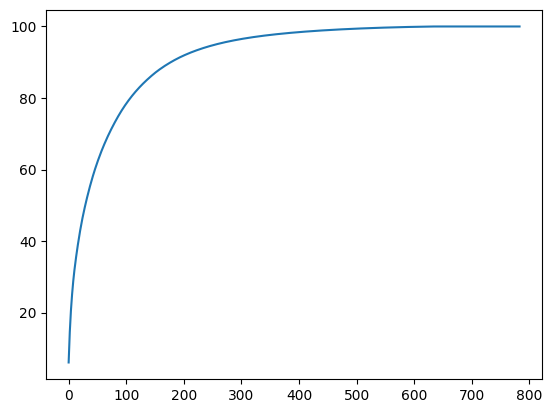

In [66]:
plt.plot(np.cumsum(pca6.explained_variance_ratio_*100))

In [71]:
# This graph tells us about the no. of components required to explaine the given percent of variance, say for example if we see in graph we find almost 200 components will expalin 90% of variance and usually we look for 90% variance

In [67]:
pca7 = PCA(n_components=0.9)
X_train_trf7 = pca7.fit_transform(X_train_sc)
X_test_trf7 = pca7.transform(X_test_sc)

In [68]:
knn=KNeighborsClassifier()
knn.fit(X_train_trf7, y_train)

y_pred7 = knn.predict(X_test_trf7)

accuracy_score(y_test, y_pred7)

0.8992248062015504

In [70]:
X_train_trf7.shape

(4124, 179)

In [72]:
# We can see that if we use float in n_components we will automatically select that no. of componets which explain the variance.
# if we ke n_components =0.9, it will take components that'll explain the 90% of the variance